# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
# importing packages 
import pandas as pd
import numpy as np

In [8]:
# importing csv data file 
data = pd.read_csv('diabetes.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
#checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# checking duplicate values
data.duplicated().sum()

0

In [14]:
# checking data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
# checking stat for overall data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [48]:
# checking zeros in each column
zero_counts = (data == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### As seen tere  are many zeros in the dataframe
#### lets remove zeros from Glucose, Bloodpressure and BMI columns for now as Skinthickness and Insulin has high amount of zeros

In [56]:
# defining the list of columns to remove zeros from 
columns_to_remove = ['Glucose', 'BloodPressure', 'BMI']

# Remove rows with zero values in the specified columns
cleaned_data = data.loc[~(data[columns_to_remove] == 0).any(axis=1)]


In [60]:
# checking number of zeros for each column
(cleaned_data == 0).sum()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

#### Insulin and SkinThickness has high zero values so we will replace it with mean values of each respective feature

In [75]:
# calculating averge values for "SkinThickness" and "Insulin"
avg_skinthickness = cleaned_data['SkinThickness'].mean()
avg_insulin = cleaned_data['Insulin'].mean()

#replacing zeros with average values
cleaned_data.loc[cleaned_data['SkinThickness'] == 0, 'SkinThickness'] = avg_skinthickness
cleaned_data.loc[cleaned_data['Insulin'] == 0, 'Insulin'] = avg_insulin

In [76]:
cleaned_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,84.494475,33.6,0.627,50,1
1,1,85,66,29.00000,84.494475,26.6,0.351,31,0
2,8,183,64,21.44337,84.494475,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00000,180.000000,32.9,0.171,63,0
764,2,122,70,27.00000,84.494475,36.8,0.340,27,0
765,5,121,72,23.00000,112.000000,26.2,0.245,30,0
766,1,126,60,21.44337,84.494475,30.1,0.349,47,1


In [86]:
# checking stat for overall data after dealing with zeros in the data
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000000,3.000000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750000,117.000000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000000,72.000000,80.0000,122.00
SkinThickness,724.0,27.130010,9.645083,7.000,21.443370,24.000000,33.0000,99.00
Insulin,724.0,123.240560,94.398997,14.000,84.494475,84.494475,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500000,32.400000,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245000,0.379000,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000000,29.000000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000000,0.000000,1.0000,1.00


<Axes: >

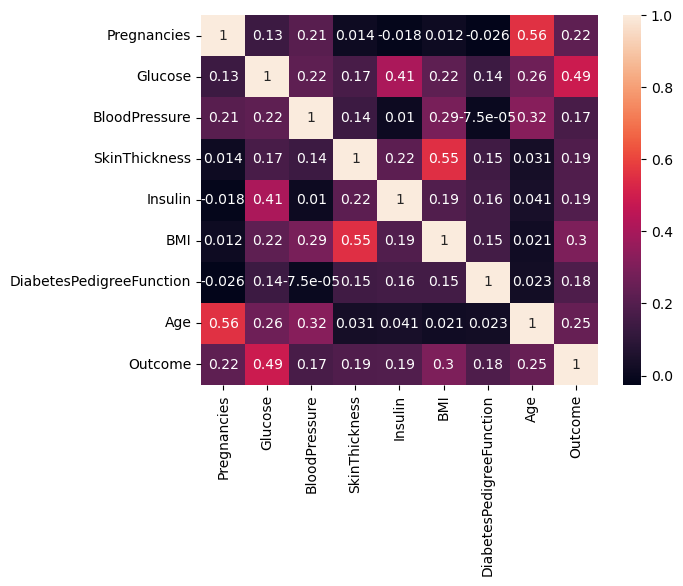

In [81]:
# checking correlation matrix between all columns
import seaborn as sns

correlation_matrix = cleaned_data.corr()

# creating heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)

#### As per heatmap Glucose is the only varialble that has highest correlation score with outcome
#### Now we will compare Glucose with Outcome

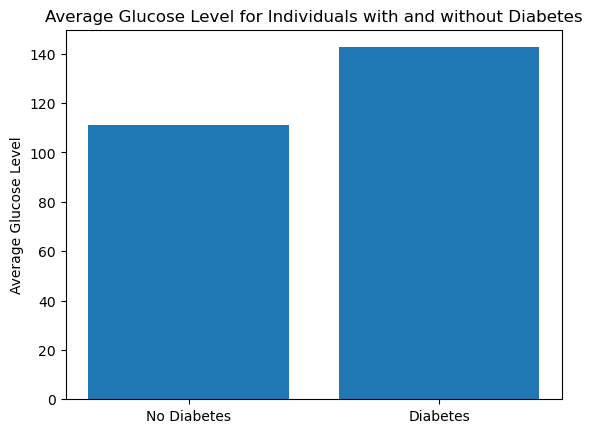

In [98]:
 import matplotlib.pyplot as plt
    
#for dataframe Cleaned_data Outcome has two values (1: diabetes, 0: no diabetes)

# calculating average glucose for people with diabetes
avg_glucose_with_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 1, 'Glucose'].mean()

# calculating averafe glucose for people with no diabetes
avg_glucose_with_no_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 0, 'Glucose'].mean()

# Create a bar chart
labels = ['No Diabetes', 'Diabetes']
averages = [avg_glucose_with_no_diabetes, avg_glucose_with_diabetes]

plt.bar(labels, averages)
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level for Individuals with and without Diabetes')
plt.show()

In [101]:
avg_glucose_with_no_diabetes

111.01684210526315

## As seen in above Bar Chart that people with aprrox more than 111.016 of average glucose tend to have diabetes

--------------------------------------------------------------------------------------------

### Now we will check the How average BMI is related with Outcome

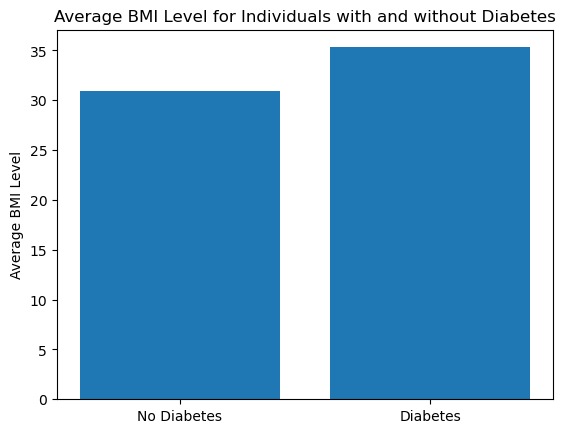

In [103]:
#for dataframe Cleaned_data Outcome has two values (1: diabetes, 0: no diabetes)

# calculating average BMI for people with diabetes
avg_bmi_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 1, 'BMI'].mean()

#calculating average BMI for people with no diabetes
avg_bmi_no_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 0, 'BMI'].mean()

# Create a bar chart
labels = ['No Diabetes', 'Diabetes']
averages = [avg_bmi_no_diabetes, avg_bmi_diabetes]

plt.bar(labels, averages)
plt.ylabel('Average BMI Level')
plt.title('Average BMI Level for Individuals with and without Diabetes')
plt.show()

In [106]:
avg_bmi_no_diabetes

30.974947368421056

## As seen in the Char people with more than 30.98 BMI tend to have diabetes

--------------------------------

## Check the Average age for people that have diabetes

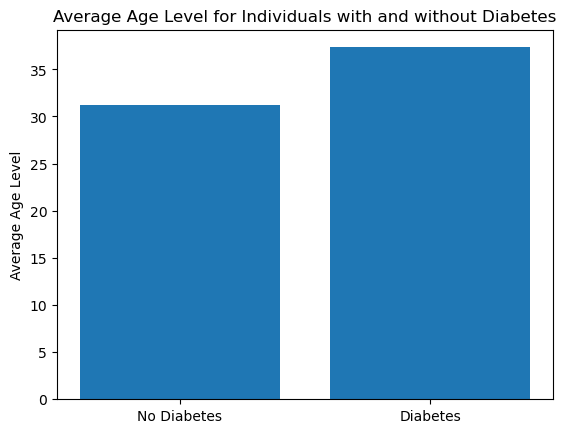

In [109]:
#for dataframe Cleaned_data Outcome has two values (1: diabetes, 0: no diabetes)

# calculating average BMI for people with diabetes
avg_age_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 1, 'Age'].mean()

#calculating average BMI for people with no diabetes
avg_age_no_diabetes = cleaned_data.loc[cleaned_data['Outcome'] == 0, 'Age'].mean()

# Create a bar chart
labels = ['No Diabetes', 'Diabetes']
averages = [avg_age_no_diabetes, avg_age_diabetes]

plt.bar(labels, averages)
plt.ylabel('Average Age Level')
plt.title('Average Age Level for Individuals with and without Diabetes')
plt.show()

In [110]:
avg_age_no_diabetes

31.25894736842105

## As seen people after after age of 31.29 has chances to get diabetes

------------------------------------------------------------------------------------------

### Checking distribution of each indipendent variable

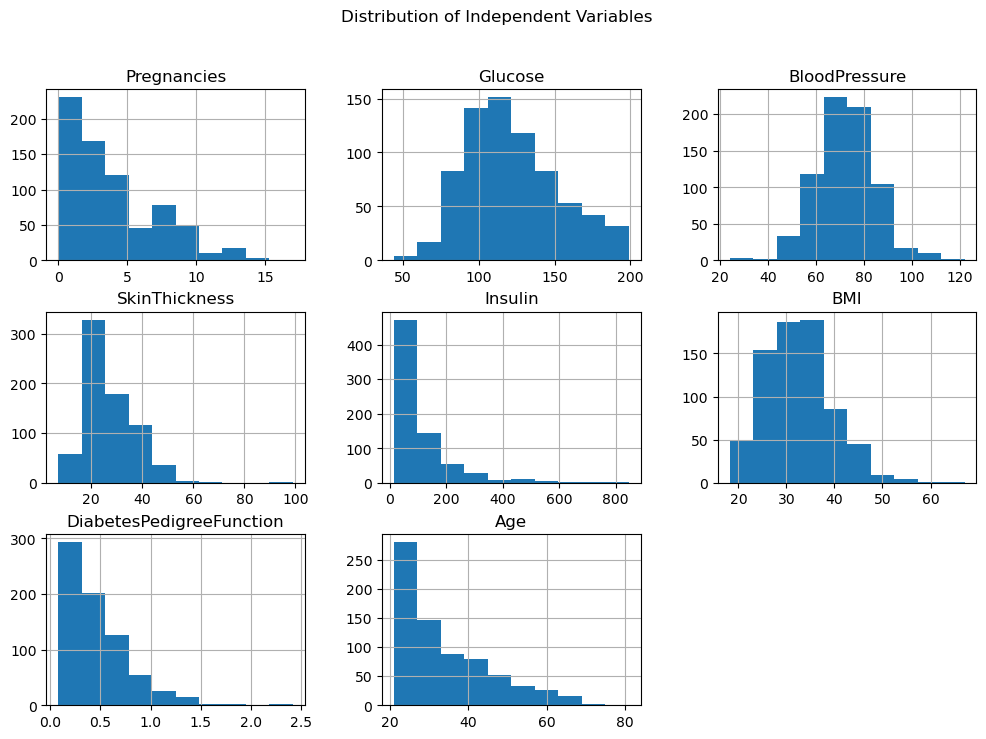

In [85]:
import matplotlib.pyplot as plt

# creating histogram for all the independent variables other then Outcome
cleaned_data.drop('Outcome', axis=1).hist(figsize=(12,8))

plt.suptitle('Distribution of Independent Variables')

plt.show()


------------------

## We will create a Logistic Regression model to check the correlation between the Target and Features

### Note: we are only taking feature that have more than 0.2 of correlation with Target variable from Corr Heatmap that we created

In [117]:
import statsmodels.api as sm

# Defining independent variable
X = cleaned_data.drop('Outcome', axis=1)

# adding constant for intercept 
X = sm.add_constant(X)

# defining independent variable
y = cleaned_data['Outcome']

# create and fit the logistic model
logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())



Optimization terminated successfully.
         Current function value: 0.463967
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  724
Model:                          Logit   Df Residuals:                      715
Method:                           MLE   Df Model:                            8
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.2791
Time:                        01:01:15   Log-Likelihood:                -335.91
converged:                       True   LL-Null:                       -465.97
Covariance Type:            nonrobust   LLR p-value:                 1.234e-51
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0231      0.826    -10.929      0.000     -10.641

## Interpreting Model

### We will remove the parameters with p value of more than 0.05 as they are not significant with the outcome and recreate the model with updated features

In [125]:
# keeping significant feature with p value of more than 0.05
significant_features = cleaned_data.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'Age'], axis=1)


In [126]:

# Defining independent variable
X = significant_features.drop('Outcome', axis=1)

# adding constant for intercept 
X = sm.add_constant(X)

# defining independent variable
y = significant_features['Outcome']

# create and fit the logistic model
logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467008
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  724
Model:                          Logit   Df Residuals:                      719
Method:                           MLE   Df Model:                            4
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                  0.2744
Time:                        02:08:06   Log-Likelihood:                -338.11
converged:                       True   LL-Null:                       -465.97
Covariance Type:            nonrobust   LLR p-value:                 3.832e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0000      0.717    -12.552      0.000     -10.405

### As seen these features are significant with the Target variable

-------------------------------------------------------------------------------------

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

## Feature selection

In [144]:
# creating X for features and y as target 

X = significant_features.drop(['Outcome'], axis=1)

y = significant_features['Outcome']

In [145]:
X.shape, y.shape

((724, 4), (724,))

In [147]:
# feature sclaing using standard scalar
from sklearn.preprocessing import StandardScaler

# create a standardscalar object
scaler = StandardScaler()

#transfrom the features for model building
X_scaled = scaler.fit_transform(X)

In [153]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [149]:
y_train.value_counts(), y_test.value_counts()

(0    373
 1    206
 Name: Outcome, dtype: int64,
 0    102
 1     43
 Name: Outcome, dtype: int64)

-------------------------------

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Logistic Regression Model

In [151]:
from sklearn.linear_model import LogisticRegression

# create and train the logistic model
model = LogisticRegression()

#train the model on training data
model.fit(X_train, y_train)

LogisticRegression()

In [155]:
# model evaluation 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# make the prediction on test set
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [161]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       102
           1       0.67      0.65      0.66        43

    accuracy                           0.80       145
   macro avg       0.76      0.76      0.76       145
weighted avg       0.80      0.80      0.80       145

Confusion Matrix:
 [[88 14]
 [15 28]]


#### Create XGBoost Model

In [163]:
import xgboost as xgb

#create an xgboost classifier
model = xgb.XGBClassifier()

#train the model on training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [164]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.7379310344827587
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.81       102
           1       0.55      0.65      0.60        43

    accuracy                           0.74       145
   macro avg       0.69      0.71      0.70       145
weighted avg       0.75      0.74      0.74       145

Confusion Matrix:
 [[79 23]
 [15 28]]


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.